### *Импорт библиотек для работы с дата-сетом* 

In [525]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
results = []

In [526]:
df = pd.read_csv('water_potability.csv')

In [527]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


некоторые общие рекомендации по диапазонам для каждого из столбцов:    
pH: Обычно варьируется от 6.5 до 8.5 для питьевой воды.     
Solids: Зависит от источника, но значения выше 1000 мг/л могут указывать на загрязнение.  
Chloramines: Обычно не должно превышать 4 мг/л.  
Sulfate: Рекомендуется не более 250 мг/л для питьевой воды.  
Conductivity: Обычно до 1000 мкСм/см для питьевой воды.  
Organic_carbon: Обычно не более 2-5 мг/л, хотя это может варьироваться.  
Trihalomethanes: Рекомендуется не более 80 мкг/л.  
Turbidity: Обычно не более 1 НТУ для питьевой воды.  
Potability: Бинарный признак (0 или 1).  

In [528]:
df.info()
#Столбец ph имеет 491 пропущенное значение.
#Столбец Sulfate имеет 781 пропущенное значение.
#Столбец Trihalomethanes имеет 162 пропущенных значения.
#Остальные столбцы не имеют пропусков.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [529]:
df.shape
#Количество строк: 3276
#Количество столбцов: 10
#Типы данных:
#float64: используются для большинства признаков (9 столбцов).
#int64: используется для целевой переменной Potability (1 столбец)

(3276, 10)

In [530]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


# Описание набора данных "Качество воды и пригодность для питья"

- **ph (pH)**: 
  - Уровень pH воды, который показывает её кислотность или щелочность. Значения варьируются от 0 до 14, где 7 считается нейтральным. Более низкие значения указывают на кислую среду, а более высокие — на щелочную.

- **Hardness (Жесткость)**: 
  - Показатель жесткости воды, который определяется содержанием кальция и магния. Измеряется в мг/л. Более высокие значения могут указывать на более жесткую воду.

- **Solids (Общие растворенные вещества)**: 
  - Общее количество растворенных веществ в воде, измеряемое в мг/л. Высокие значения могут указывать на загрязнение воды.

- **Chloramines (Хлорамины)**: 
  - Уровень хлораминов в воде, который используется как дезинфицирующее средство. Измеряется в мг/л. Высокие уровни могут быть вредными для здоровья.

- **Sulfate (Сульфаты)**: 
  - Концентрация сульфатов в воде, измеряемая в мг/л. Сульфаты могут влиять на вкус воды и её качество.

- **Conductivity (Электропроводность)**: 
  - Показатель электропроводности воды, измеряемый в мкСм/см. Высокая проводимость может свидетельствовать о наличии большого количества растворенных веществ.

- **Organic_carbon (Органический углерод)**: 
  - Концентрация органического углерода в воде, измеряемая в мг/л. Высокие уровни могут указывать на загрязнение органическими веществами.

- **Trihalomethanes (Трихалометаны)**: 
  - Уровень тригалометанов в воде, которые образуются при хлорировании и могут быть канцерогенными. Измеряется в мкг/л.

- **Turbidity (Мутность)**: 
  - Показатель мутности воды, который отражает наличие взвешенных частиц. Измеряется в НТУ (непосредственных единицах мутности). Высокие значения указывают на плохое качество воды.

- **Potability (Пригодность для питья)**: 
  - Целевая переменная, которая указывает на то, пригодна ли вода для питья (1) или нет (0). Это бинарный признак, который является основным объектом анализа.

# Проверки

In [531]:
df.duplicated().sum() 

np.int64(0)

In [532]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [533]:
#Общее количество пропущенных значений:
#ph: 491
#Sulfate: 781
#Trihalomethanes: 162
#Остальные столбцы не имеют пропусков.

In [534]:
df.duplicated().sum()
#в наборе данных нет полностью идентичных строк, что является хорошим знаком.

np.int64(0)

In [535]:
df['Potability'].value_counts()
#Значение 0 (непригодно для питья) встречается 1998 раз, а значение 1 (пригодно для питья) — 1278 раз.
#Наблюдается некоторый дисбаланс классов, но это не критично.

Potability
0    1998
1    1278
Name: count, dtype: int64

# *Проверим датафрейм на наличие пропущенных значений с помощью команды*

In [536]:
unique_counts = {col: df[col].nunique() for col in df.columns}
print(unique_counts)
#Каждый столбец имеет уникальные значения:
#ph: 2785 уникальных значений
#Hardness, Solids, Chloramines, Conductivity, Organic_carbon, Turbidity: все имеют 3276 уникальных значений.
#Sulfate: 2495 уникальных значений, что указывает на наличие пропусков.
#Trihalomethanes: 3114 уникальных значений.
#Целевая переменная Potability имеет 2 уникальных значения (0 и 1), что соответствует бинарной классификации.

{'ph': 2785, 'Hardness': 3276, 'Solids': 3276, 'Chloramines': 3276, 'Sulfate': 2495, 'Conductivity': 3276, 'Organic_carbon': 3276, 'Trihalomethanes': 3114, 'Turbidity': 3276, 'Potability': 2}


# Обработка пропусков в данных

In [537]:
# Заполнение пропусков средним значением
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

print(df.isna().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


/var/folders/dq/ms57v47d7c3_4kj92m1m8j940000gn/T/ipykernel_94614/2700232233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].mean(), inplace=True)
/var/folders/dq/ms57v47d7c3_4kj92m1m8j940000gn/T/ipykernel_94614/2700232233.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

# Находятся ли значения в указанных диапазонах

In [538]:
# Обработка Conductivity
df.loc[df['Conductivity'] < 0, 'Conductivity'] = df['Conductivity'].median()  
df.loc[df['Conductivity'] > 1000, 'Conductivity'] = df['Conductivity'].median()  

print(df.isna().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


/var/folders/dq/ms57v47d7c3_4kj92m1m8j940000gn/T/ipykernel_94614/1542138431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette='viridis')


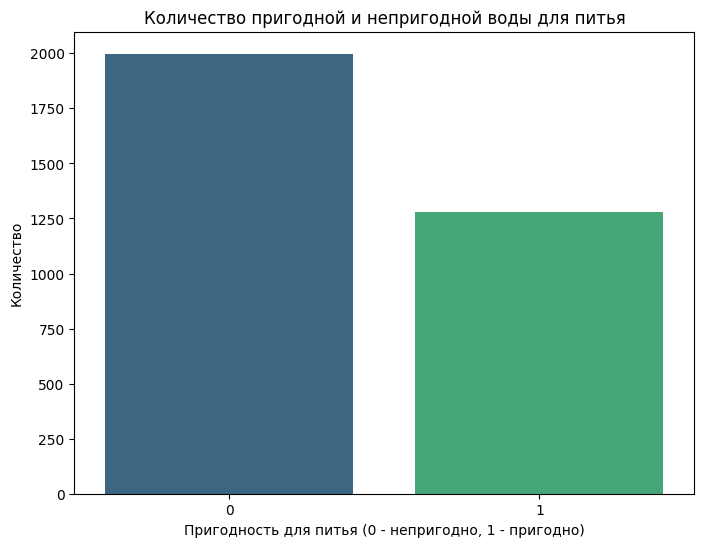

In [540]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Potability', data=df, palette='viridis')

# Добавление заголовка и меток осей
plt.title('Количество пригодной и непригодной воды для питья')
plt.xlabel('Пригодность для питья (0 - непригодно, 1 - пригодно)')
plt.ylabel('Количество')

# Показать график
plt.show()


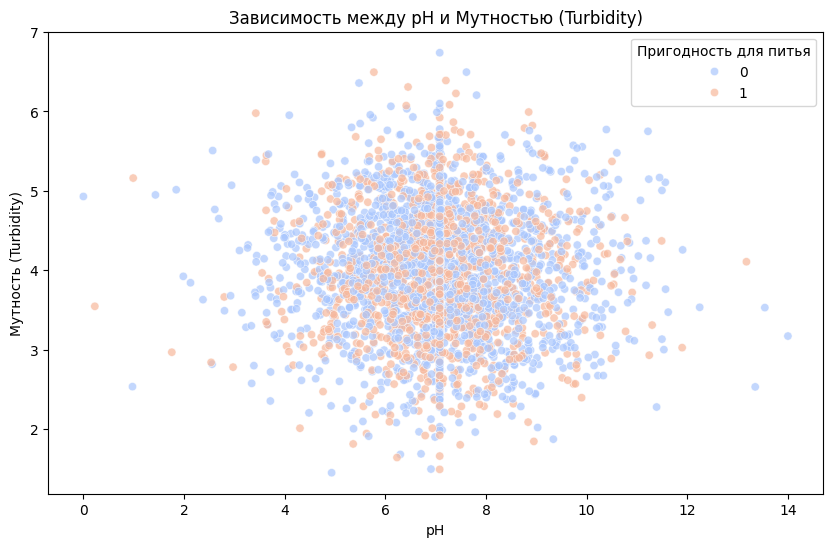

In [541]:
#График зависимости между pH и Turbidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ph'], y=df['Turbidity'], hue='Potability', data=df, palette='coolwarm', alpha=0.7)
plt.title('Зависимость между pH и Мутностью (Turbidity)')
plt.xlabel('pH')
plt.ylabel('Мутность (Turbidity)')
plt.legend(title='Пригодность для питья', loc='upper right')
plt.show()

Что показывает: Этот график показывает, как значения pH соотносятся с мутностью воды.
Цветовая кодировка (hue) указывает на пригодность воды для питья (0 или 1).
Интерпретация:
Можно увидеть, как мутность изменяется в зависимости от pH. 
Например, если мутность увеличивается при низких значениях pH,
это может указывать на проблемы с качеством воды.

Коробчатая диаграмма показывает распределение уровней хлораминов в зависимости от того, пригодна ли вода для питья.
Интерпретация: 
Можно увидеть медиану и разброс значений хлораминов для каждой категории. Если значения
хлораминов значительно выше в категории непригодной воды, 
это может указывать на то, что высокие уровни хлораминов связаны с низкой пригодностью.

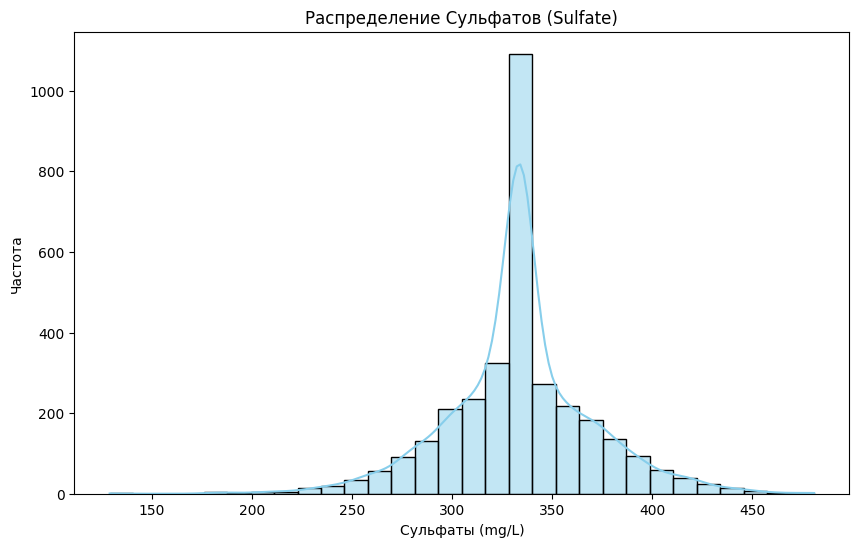

In [542]:
#Гистограмма для Sulfate
plt.figure(figsize=(10, 6))
sns.histplot(df['Sulfate'], bins=30, kde=True, color='skyblue')
plt.title('Распределение Сульфатов (Sulfate)')
plt.xlabel('Сульфаты (mg/L)')
plt.ylabel('Частота')
plt.show()

Что показывает: 
Гистограмма показывает распределение значений сульфатов в вашем наборе данных.
Интерпретация:
Можно увидеть, как часто встречаются различные уровни сульфатов. Наличие пиков может указывать на предпочтительные уровни сульфатов в воде.

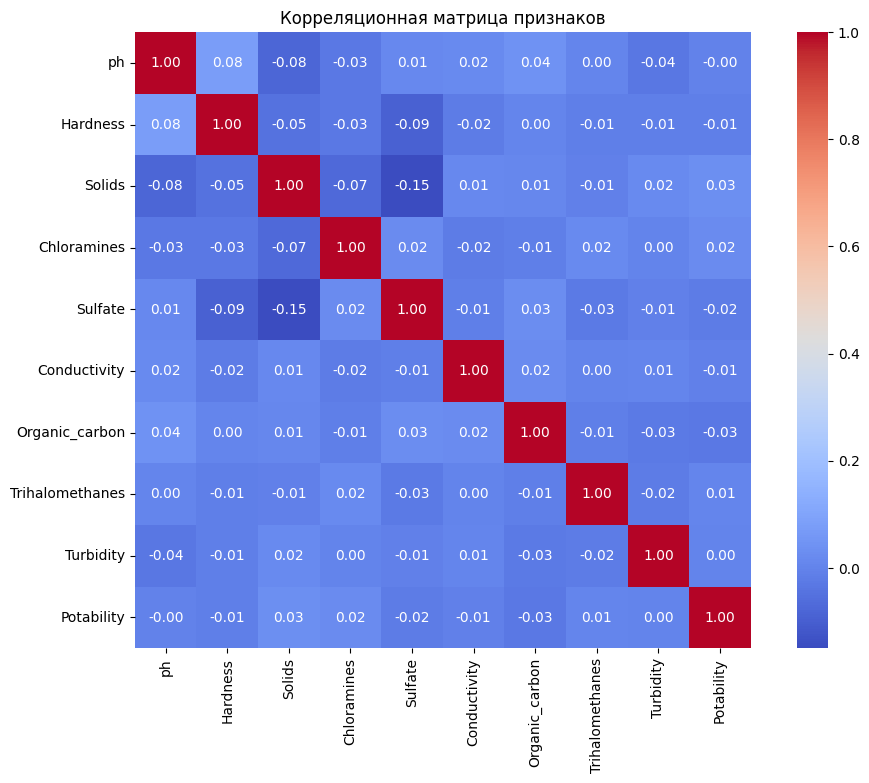

In [543]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Корреляционная матрица признаков")
plt.show()

Что показывает: Тепловая карта отображает корреляцию между всеми числовыми признаками в наборе данных.
Интерпретация: Значения ближе к 1 или -1 указывают на сильную корреляцию между признаками. Например, если Chloramines и
Potability имеют высокую отрицательную корреляцию, это может означать,
что более высокие уровни хлораминов связаны с меньшей вероятностью пригодности.

### Формирование дата-сета для обучения моделей

In [544]:

# список имён признаков, которые будут использоваться для построения модели
features_names = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", 
                   "Conductivity", "Organic_carbon", "Trihalomethanes", 
                   "Turbidity"]

In [545]:
X = df[features_names]

In [546]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [547]:
y = df["Potability"]

In [548]:
print(df[features_names].describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786  
std       80.824064        3.308162        15.769881     0.780382  
min      181.483754        2.200000         0.738000

### Обучение моделей (models fitting)

In [549]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [550]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2194, 9) (1082, 9) (2194,) (1082,)


In [551]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [552]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Метод k-ближайших соседей

In [553]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Прогнозирование (prediction)

In [554]:
knn_predict = knn.predict(X_test)

In [555]:
knn_accuracy = accuracy_score(knn_predict, y_test)
knn_accuracy

0.5582255083179297

In [556]:
confusion_matrix(knn_predict, y_test)

array([[478, 276],
       [202, 126]])

print(classification_report(knn_predict, y_test))

### Метод опорных векторов

In [557]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [558]:
svc_predict = svc.predict(X_test)

In [559]:
svc_accuracy = accuracy_score(svc_predict, y_test)
svc_accuracy

0.6284658040665434

In [560]:
confusion_matrix(svc_predict, y_test)

array([[680, 402],
       [  0,   0]])

### Классификатор дерева решений

In [561]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [562]:
dtc_predict = dtc.predict(X_test)

In [563]:
dtc_accuracy = accuracy_score(dtc_predict, y_test)  

In [564]:
confusion_matrix(dtc_predict, y_test)

array([[444, 209],
       [236, 193]])

### RandomForestClassifier

In [565]:

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [566]:
rfc_predict = rfc.predict(X_test)

In [567]:
rfc_accuracy = accuracy_score(rfc_predict, y_test)


In [568]:
confusion_matrix(rfc_predict, y_test)

array([[599, 262],
       [ 81, 140]])

### Наивный байесовский классификатор

In [569]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [570]:
gnb_predict = gnb.predict(X_test)

In [571]:
gnb_accuracy = accuracy_score(gnb_predict, y_test)

In [572]:
confusion_matrix(gnb_predict, y_test)

array([[603, 314],
       [ 77,  88]])

In [573]:
print(classification_report(gnb_predict, y_test)) 

              precision    recall  f1-score   support

           0       0.89      0.66      0.76       917
           1       0.22      0.53      0.31       165

    accuracy                           0.64      1082
   macro avg       0.55      0.60      0.53      1082
weighted avg       0.78      0.64      0.69      1082



### Логистическая регрессия

In [574]:
lrn = LogisticRegression()
lrn.fit(X_train, y_train)

/Users/aror/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [575]:
lrn_predict = lrn.predict(X_test)

In [576]:
lrn_accuracy = accuracy_score(lrn_predict, y_test)


In [577]:
confusion_matrix(lrn_predict, y_test)

array([[680, 402],
       [  0,   0]])

### Сравнение моделей

In [578]:
classifiers =["KNeighborsClassifier","Gaussian Naive Bayes","Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lrn_accuracy]

In [579]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.558226
1,Gaussian Naive Bayes,0.638632
2,Random Forest Classifier,0.682994
3,Logistic Regression,0.628466


<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

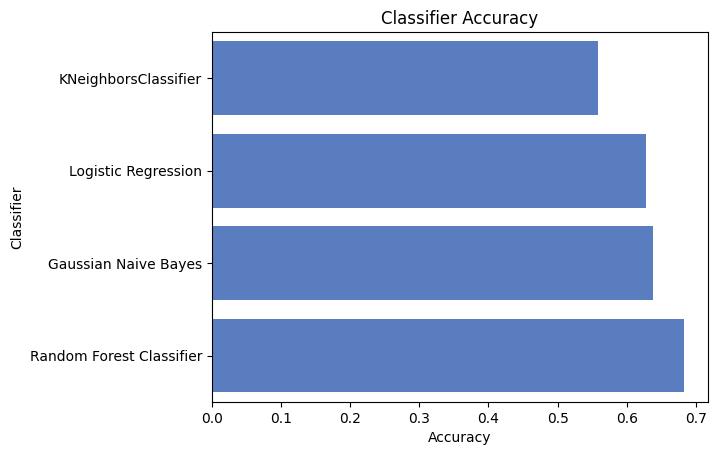

In [580]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")    
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

In [581]:
knn_precision = precision_score(y_test, knn_predict)
knn_recall = recall_score(y_test, knn_predict)
knn_f1 = f1_score(y_test, knn_predict)


In [582]:
rfc_precision = precision_score(y_test, rfc_predict)
rfc_recall = recall_score(y_test, rfc_predict)
rfc_f1 = f1_score(y_test, rfc_predict)

In [583]:
gnb_precision = precision_score(y_test, gnb_predict)
gnb_recall = recall_score(y_test, gnb_predict)
gnb_f1 = f1_score(y_test, gnb_predict)


In [584]:
lrn_precision = precision_score(y_test, lrn_predict)
lrn_recall = recall_score(y_test, lrn_predict)
lrn_f1 = f1_score(y_test, lrn_predict)

/Users/aror/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [585]:
log["Precision"] = [knn_precision,  gnb_precision, rfc_precision, lrn_precision]
log["Recall"] = [knn_recall, gnb_recall, rfc_recall, lrn_recall]
log["F1-Score"] = [knn_f1, gnb_f1, rfc_f1, lrn_f1]

print(log)

                 Classifier  Accuracy  Precision    Recall  F1-Score
0      KNeighborsClassifier  0.558226   0.384146  0.313433  0.345205
1      Gaussian Naive Bayes  0.638632   0.533333  0.218905  0.310406
2  Random Forest Classifier  0.682994   0.633484  0.348259  0.449438
3       Logistic Regression  0.628466   0.000000  0.000000  0.000000


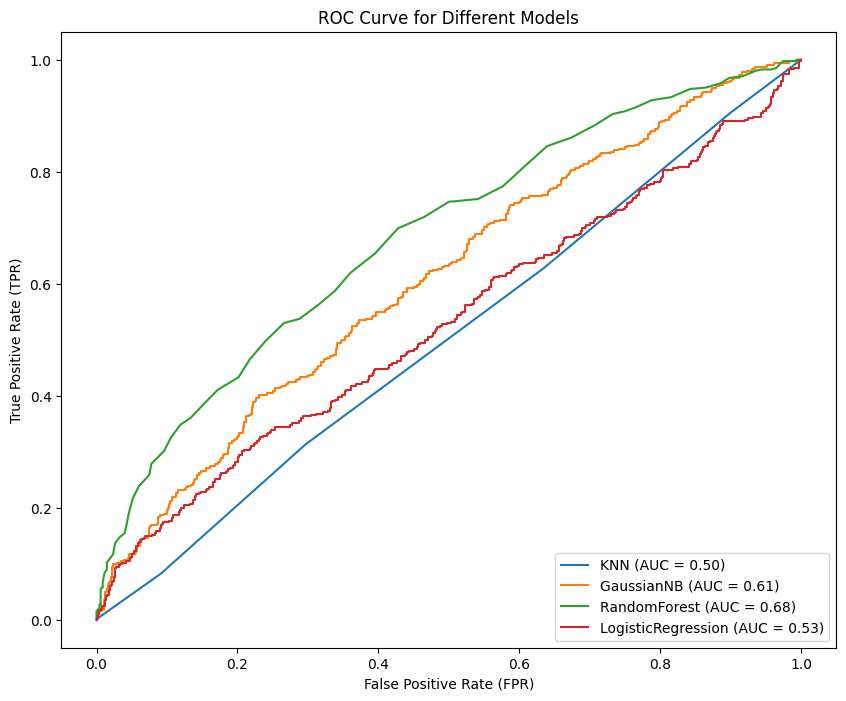

In [586]:
from sklearn.metrics import roc_auc_score, roc_curve


knn_proba = knn.predict_proba(X_test)[:, 1]
gnb_proba = gnb.predict_proba(X_test)[:, 1]
lrn_proba = lrn.predict_proba(X_test)[:, 1]
rfc_proba = rfc.predict_proba(X_test)[:, 1] 

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb_proba)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_proba)
fpr_lrn, tpr_lrn, _ = roc_curve(y_test, lrn_proba)

auc_knn = roc_auc_score(y_test, knn_proba)
auc_gnb = roc_auc_score(y_test, gnb_proba)
auc_rfc = roc_auc_score(y_test, rfc_proba)
auc_lrn = roc_auc_score(y_test, lrn_proba)


plt.figure(figsize=(10, 8))

plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_gnb, tpr_gnb, label=f'GaussianNB (AUC = {auc_gnb:.2f})')
plt.plot(fpr_rfc, tpr_rfc, label=f'RandomForest (AUC = {auc_rfc:.2f})')
plt.plot(fpr_lrn, tpr_lrn, label=f'LogisticRegression (AUC = {auc_lrn:.2f})')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')
plt.show()